In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Get the unified BCG Strain spreadsheet
df = pd.read_csv('/Users/hitteshkumarm/Downloads/risk.csv')
df.head()
df.columns.values.tolist()

['Recreational', 'Health', 'Career', 'Financial', 'Safety', 'Social']

In [3]:
df.isnull().sum()

Recreational    0
Health          0
Career          0
Financial       0
Safety          0
Social          0
dtype: int64

In [4]:
df.shape

(563, 6)

In [5]:
df.describe()

,Recreational,Health,Career,Financial,Safety,Social
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,2.190053,2.396092,2.007105,2.026643,2.266430,2.017762
std,1.057648,1.154190,1.022845,0.943794,0.958234,1.026189
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


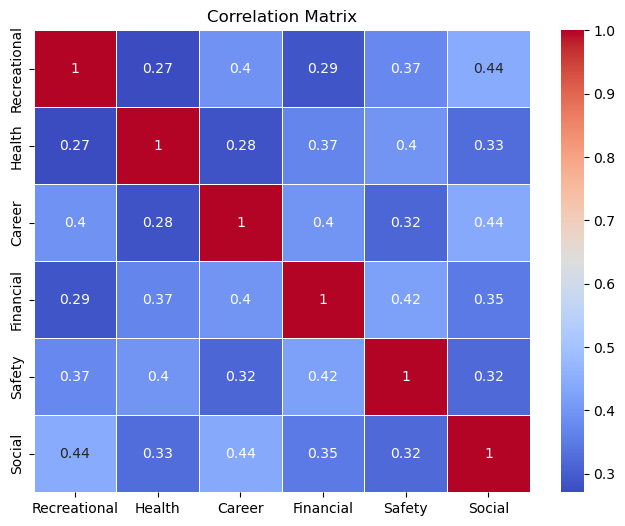

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

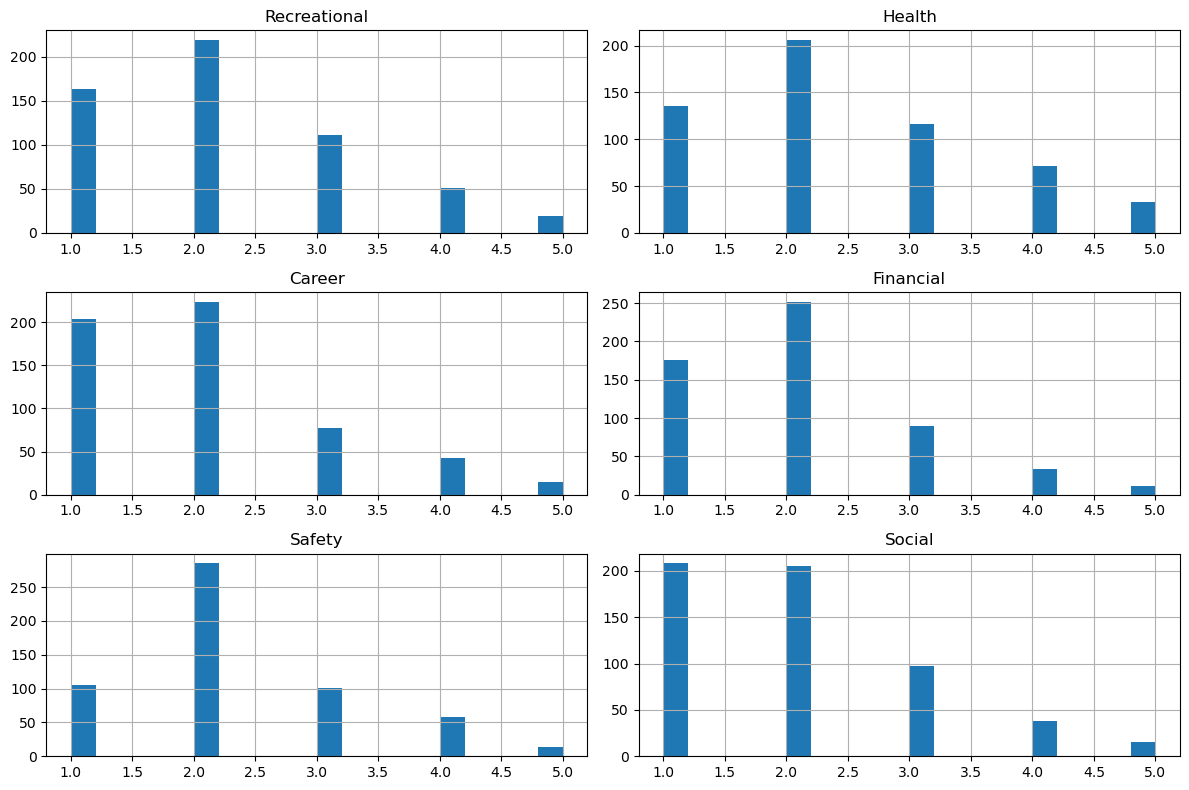

In [7]:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

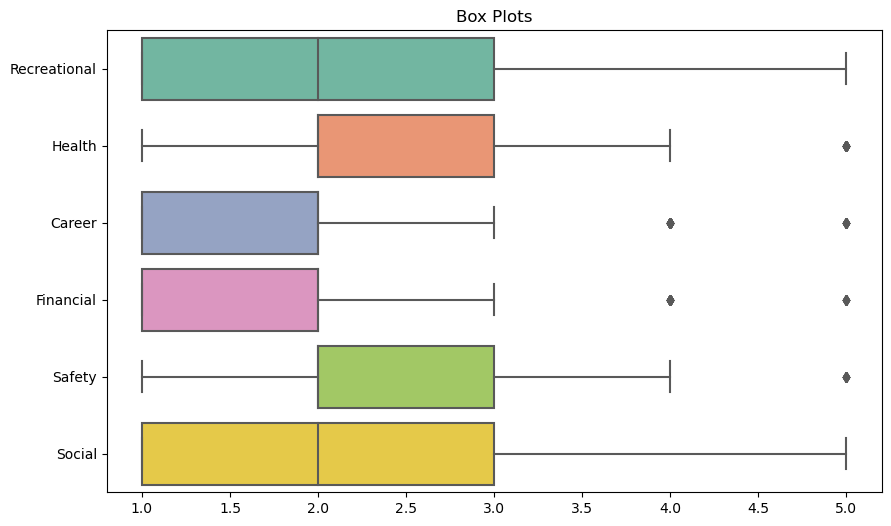

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title("Box Plots")
plt.show()

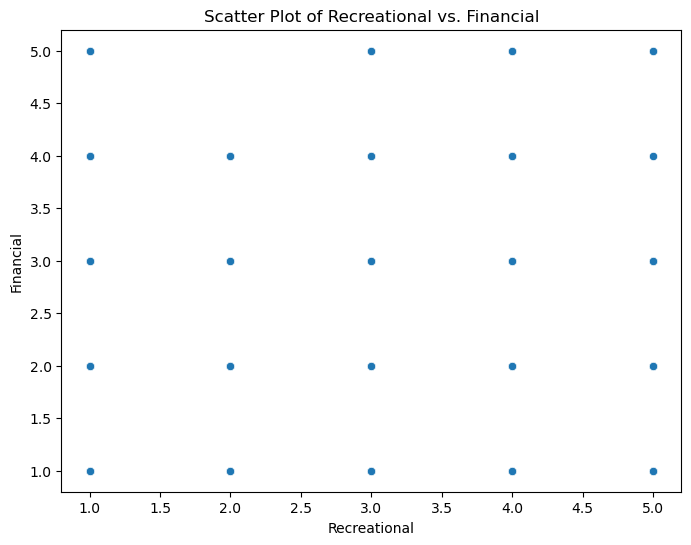

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recreational', y='Financial', data=df)
plt.title("Scatter Plot of Recreational vs. Financial")
plt.show()

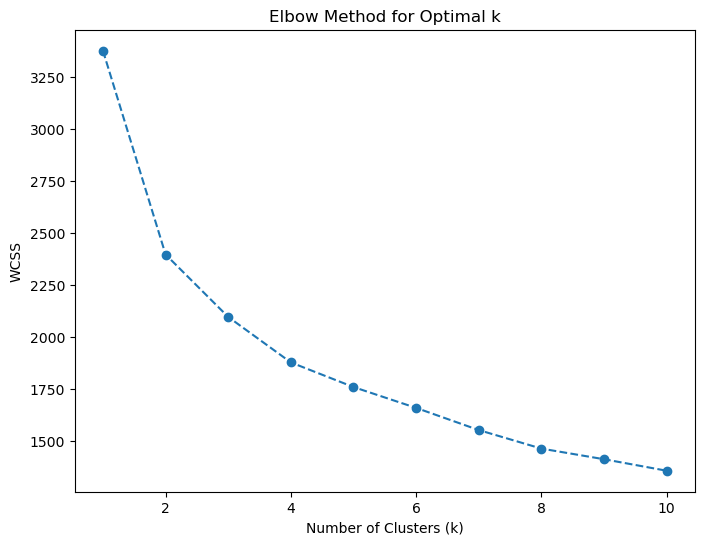

In [10]:
X = df[['Recreational', 'Health', 'Career', 'Financial', 'Safety', 'Social']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()





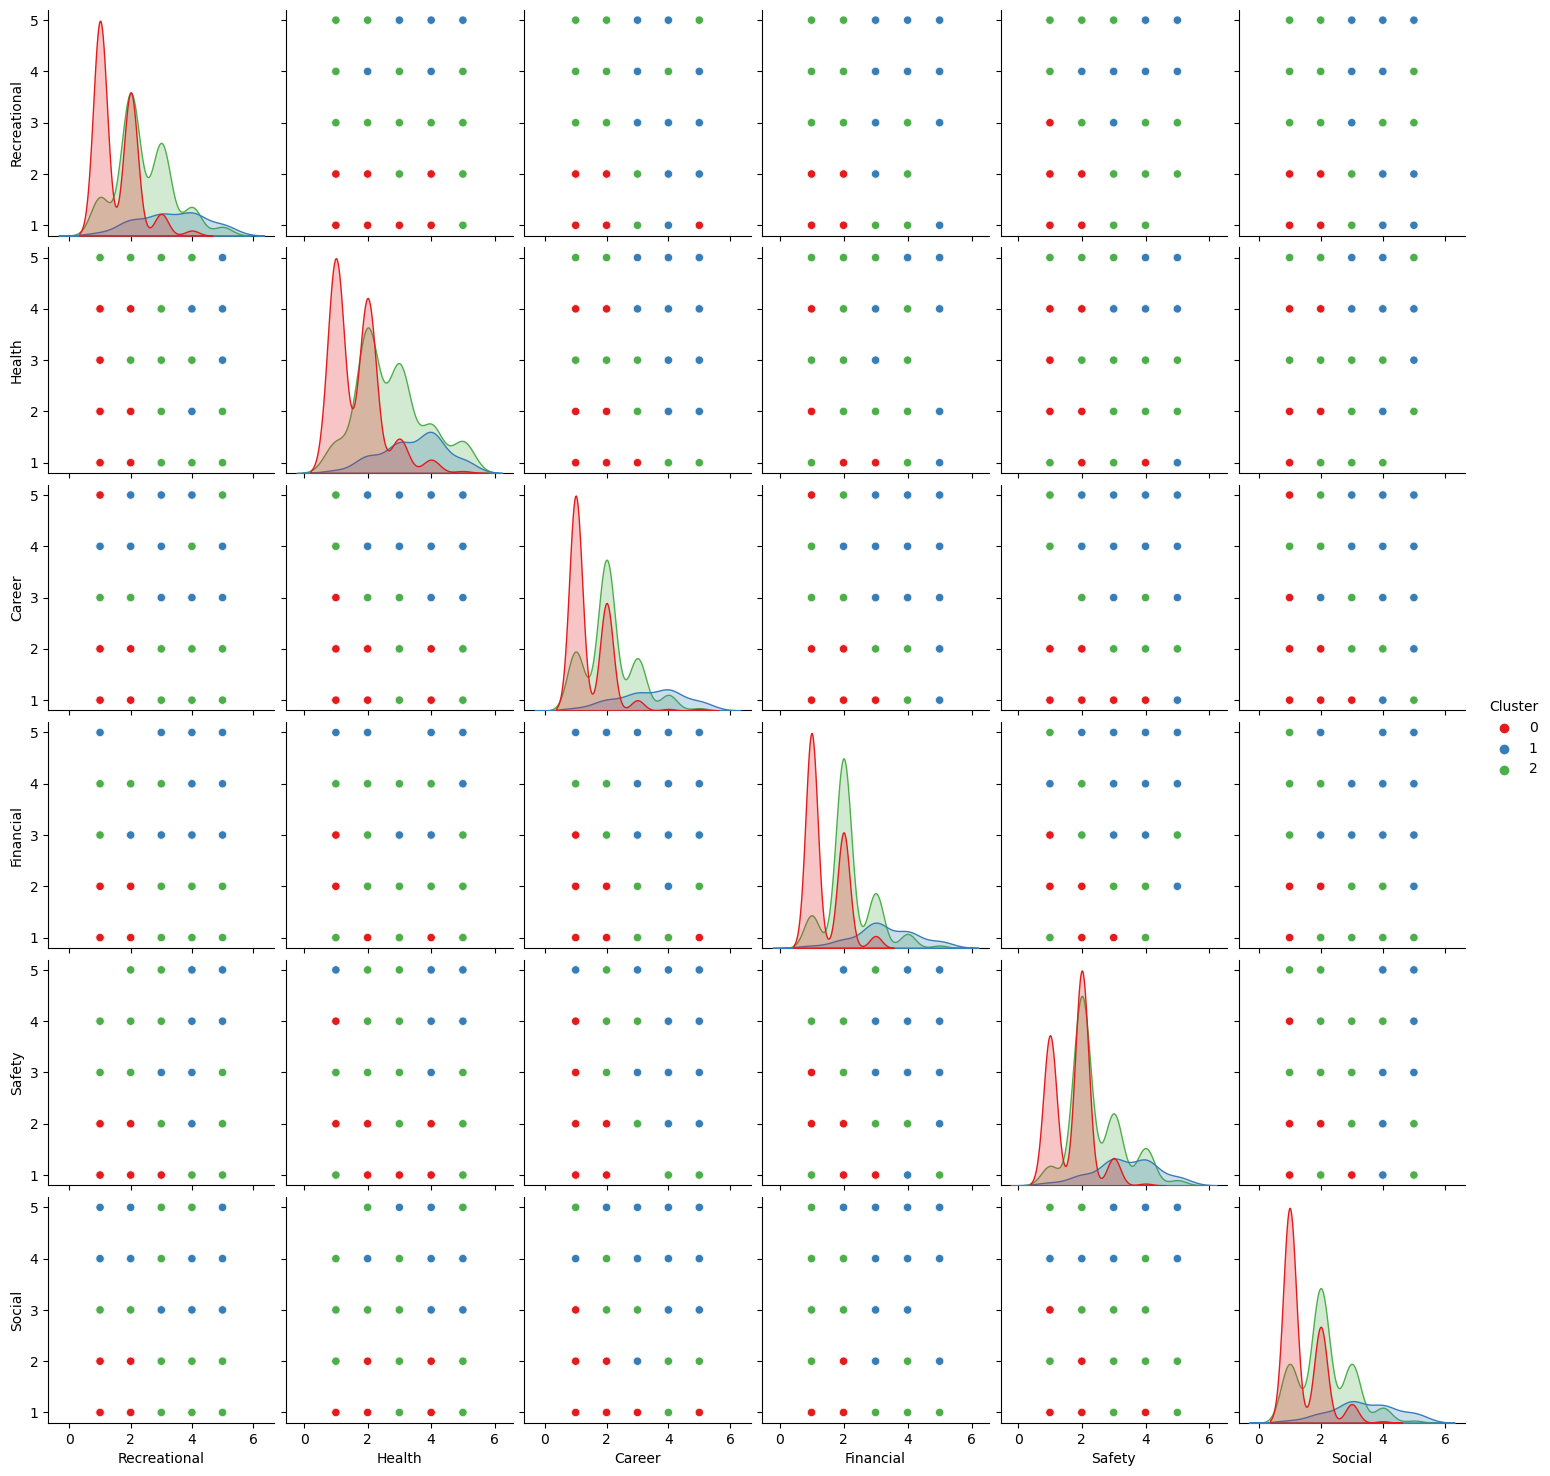

In [12]:
# Perform clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset and select relevant features
X = df[['Recreational', 'Health', 'Career', 'Financial', 'Safety', 'Social']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3 
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {dbi}")

# Calculate Inertia (Within-Cluster Sum of Squares)
inertia = kmeans.inertia_
print(f"Inertia (Within-Cluster Sum of Squares): {inertia}")


Silhouette Score: 0.19212015423094822
Davies-Bouldin Index: 1.6955219602837162
Inertia (Within-Cluster Sum of Squares): 2097.5781600623422


In [16]:
means_by_cluster = df.groupby('Cluster').mean()

print(means_by_cluster)

         Recreational    Health    Career  Financial    Safety    Social
Cluster                                                                 
0            1.523810  1.662338  1.411255   1.406926  1.696970  1.415584
1            3.325000  3.437500  3.400000   3.287500  3.362500  3.387500
2            2.440476  2.738095  2.111111   2.194444  2.440476  2.134921
